# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [1]:
%config IPCompleter.greedy=True
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv') 

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)
project_data.tail(100)
project_data.shape  

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


(109248, 17)

In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.tail(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
1541270,p031981,Flormoon DC Motor Mini Electric Motor 0.5-3V 1...,2,8.14
1541271,p031981,WAYLLSHINE 6PCS 2 x 1.5V AAA Battery Spring Cl...,2,7.39


# 1.2 Data Analysis

Number of projects that are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects that are not approved for funding  16542 , ( 15.141695957820739 %)


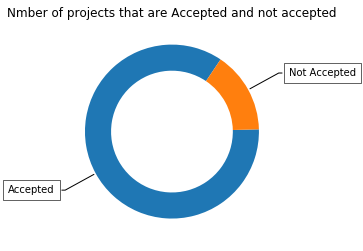

In [5]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects that are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects that are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.3), startangle=56)

bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.6)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

**Observation(s):**

1. Donors choose data set is not balanced data set.

# 1.2.1 Univariate Analysis: School State

In [6]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']


''' #How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(scope='usa',projection=dict( type='albers usa' ),showlakes = True,lakecolor = 'rgb(255, 255, 255)',),)

fig = layout.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')'''


' #How to plot US state heatmap: https://datascience.stackexchange.com/a/9620\n\nscl = [[0.0, \'rgb(242,240,247)\'],[0.2, \'rgb(218,218,235)\'],[0.4, \'rgb(188,189,220)\'],            [0.6, \'rgb(158,154,200)\'],[0.8, \'rgb(117,107,177)\'],[1.0, \'rgb(84,39,143)\']]\n\ndata = [ dict(\n        type=\'choropleth\',\n        colorscale = scl,\n        autocolorscale = False,\n        locations = temp[\'state_code\'],\n        z = temp[\'num_proposals\'].astype(float),\n        locationmode = \'USA-states\',\n        text = temp[\'state_code\'],\n        marker = dict(line = dict (color = \'rgb(255,255,255)\',width = 2)),\n        colorbar = dict(title = "% of pro")\n    ) ]\n\nlayout = dict(title = \'Project Proposals % of Acceptance Rate by US States\',\n        geo = dict(scope=\'usa\',projection=dict( type=\'albers usa\' ),showlakes = True,lakecolor = \'rgb(255, 255, 255)\',),)\n\nfig = layout.Figure(data=data, layout=layout)\noffline.iplot(fig, filename=\'us-map-heat-map\')'

In [7]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))


States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [8]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)
  
    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [9]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
   

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)

    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

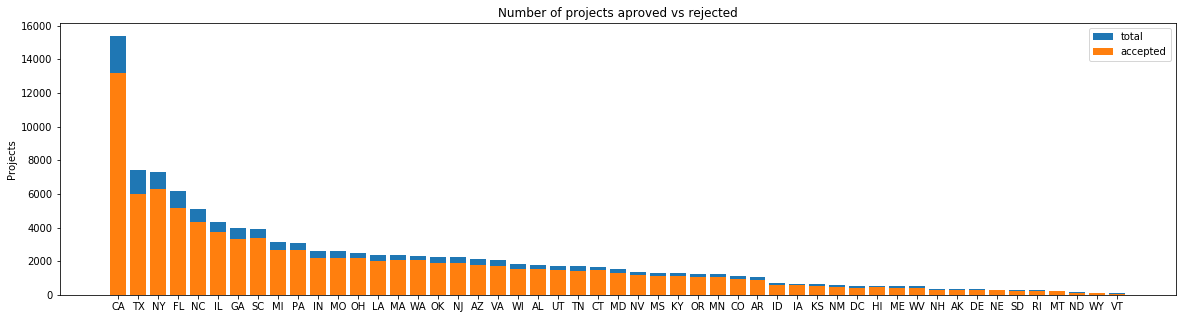

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [10]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY:<br>
1)Every state has greater than 80% success rate in project approval.<br>
2)Distribution of bar plot almost most looks like power law distribution hence we can say that 80% of the project proposals came from 20%(10-states of USA) of the USA states.<br>
3)Lots of variation in number of project proposal in CA When compare to others states.
__

### 1.2.2 Univariate Analysis: teacher_prefix

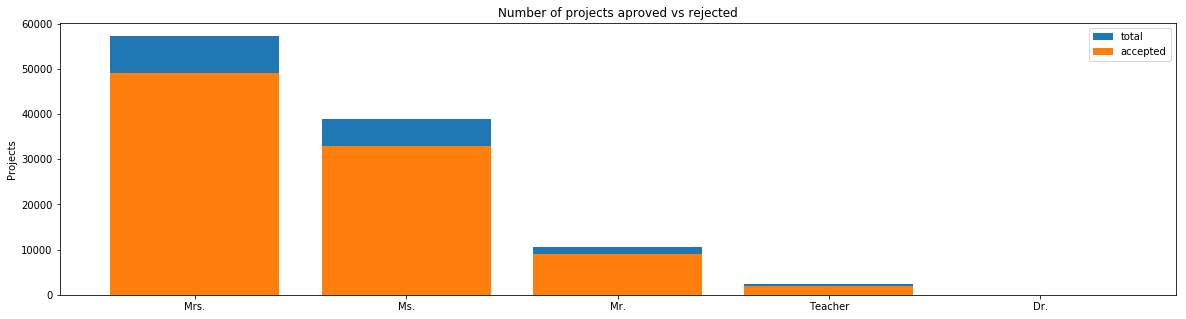

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


(109248, 22)

In [153]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)
project_data.shape  

__SUMMARY:<br>
1) Senior lectures used to send more project proposals and approval rate is also high for senior lectures because they have good knowledge regarding how to write project proposal. 
 <br>
2) Project proposal sent by Mrs., Ms. and Mr. have greater success rate when compared to Teacher and Dr.
__


### 1.2.3 Univariate Analysis: project_grade_category

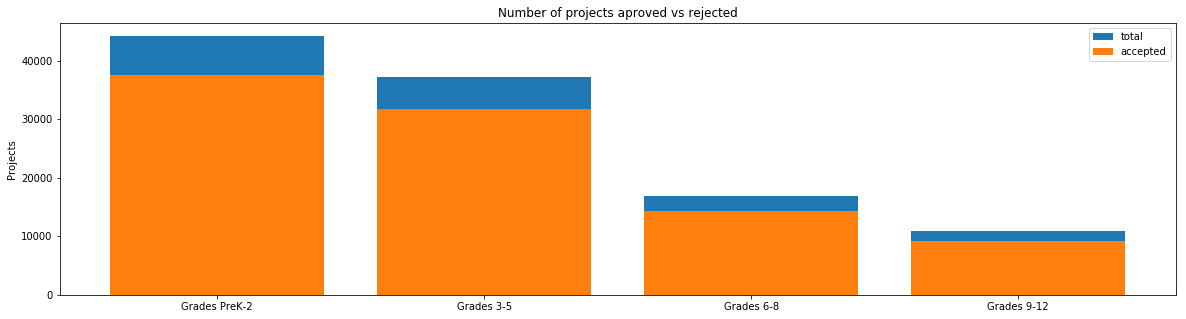

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [12]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

__SUMMARY:<br>
1)	Lots of variation in number of project submission when we consider grades.<br>
2)	We can see that as grade increases , number of project submission decreases because when grade increases students must focus more on studies. <br>
3) Every grade has greater than 80% success rate in approval.
__


### 1.2.4 Univariate Analysis: project_subject_categories

In [13]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [14]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,34858,p000002,638363148ff34bcbe004fcaeb7c9a544,Mrs.,HI,9/20/2016 21:19,Grades 6-8,History & Geography,21st Century Learners Across the Ocean,Our native Hawaiian students of the valley hai...,We like to combine 21st century learning with ...,NaN,NaN,My students need headphones and supplemental s...,1,1,History_Civics
1,89122,p000003,c8e40d76c14dbc404075f9013d5cd166,Mrs.,NY,6/23/2016 9:21,Grades PreK-2,Literature & Writing,Kindergarten Loves Literacy Centers,My students are excited for their first year i...,Our students love literacy centers! Every morn...,NaN,NaN,My students need phonemic awareness learning c...,5,1,Literacy_Language


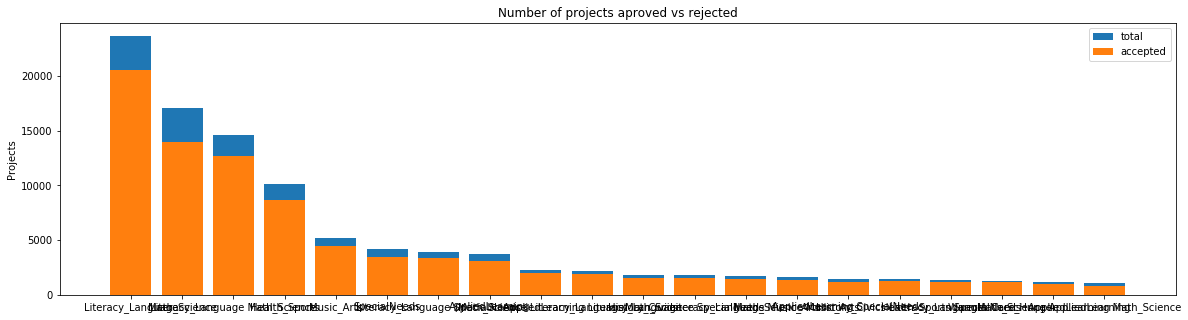

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [15]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

__SUMMARY:<br>
1)	Lots of variation in number of project submission when we consider categories.<br>
2) Distribution of bar plot almost most looks like power law distribution  <br>
3) Every clean_categories has greater than 80% success rate in approval.<br>
4) “Warmth Care_Hunger” category has highest percentage of  acceptance. 
__


In [16]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

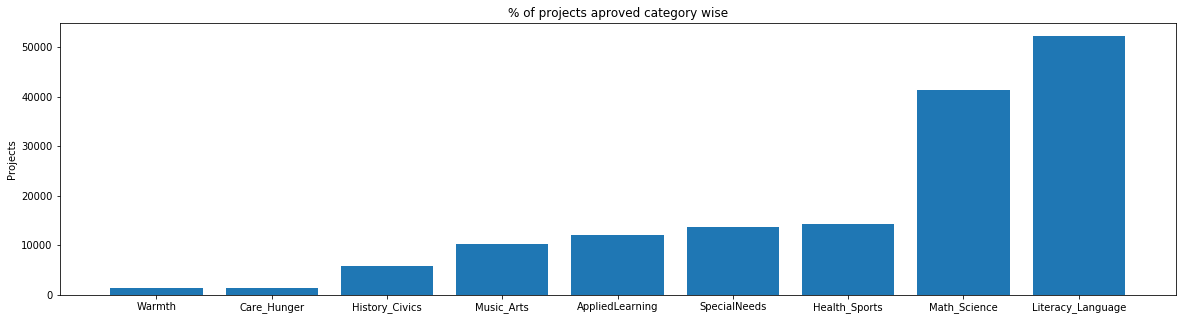

In [17]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [18]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [19]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [20]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,34858,p000002,638363148ff34bcbe004fcaeb7c9a544,Mrs.,HI,9/20/2016 21:19,Grades 6-8,21st Century Learners Across the Ocean,Our native Hawaiian students of the valley hai...,We like to combine 21st century learning with ...,NaN,NaN,My students need headphones and supplemental s...,1,1,History_Civics,History_Geography
1,89122,p000003,c8e40d76c14dbc404075f9013d5cd166,Mrs.,NY,6/23/2016 9:21,Grades PreK-2,Kindergarten Loves Literacy Centers,My students are excited for their first year i...,Our students love literacy centers! Every morn...,NaN,NaN,My students need phonemic awareness learning c...,5,1,Literacy_Language,Literature_Writing


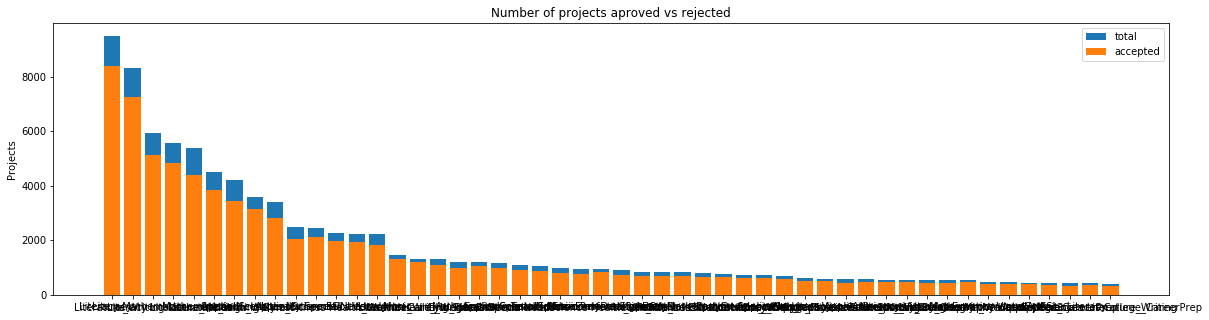

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [21]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

__SUMMARY:<br>
1)	Lots of variation in number of project submission when we consider Project subcategories.<br>
2) Distribution of bar plot almost most looks like power law distribution hence we can say that 80% of the project proposals came from 20% of subcategories. <br>
3) Every clean_categories has greater than 80% success rate in approval.<br>
__


In [22]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    

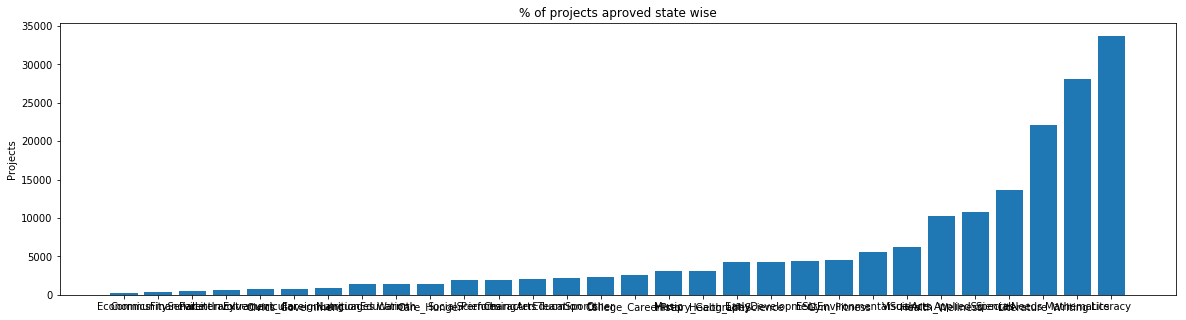

In [23]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [24]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.6 Univariate Analysis: Text features (Title)

{4: 19979, 5: 19677, 3: 18691, 6: 14823, 7: 10631, 2: 8733, 8: 7289, 9: 5382, 10: 3968, 1: 33, 11: 30, 12: 11, 13: 1}


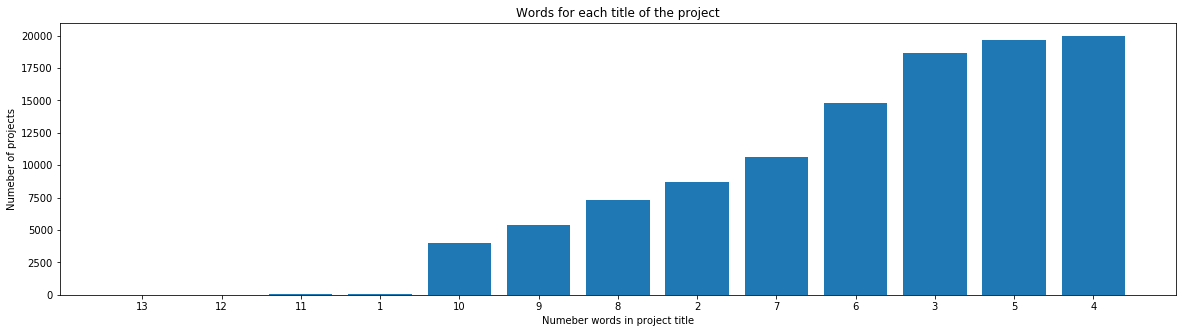

In [25]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
print(word_dict)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [26]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

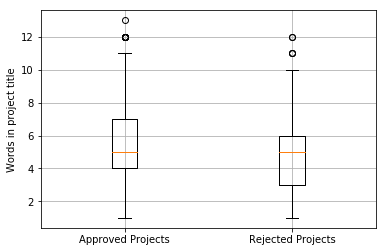

In [27]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

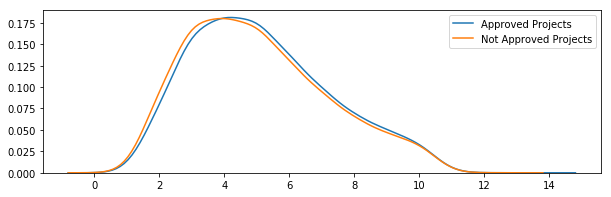

In [28]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

__ SUMMARY:<br>
1) Project acceptation rate is too low when project title has too more number words in title (greeter than 12) and too less number words in title (less than 2)  .<br>
2) Number of words in title is slightly high for approved project when compared to rejected projects.<br>
3) PDF curve almost looks like Gaussian distribution and PDF curve of approved projects is slightly ahead when compared to reject project hence we can say chances of accepting the project is more when title have more number of words(less than 12)__


### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [29]:
# merge two column text dataframe: 
  
project_data["essay"] = project_data["project_essay_1"].map(str)+\
                        project_data["project_essay_2"].map(str)+ \
                        project_data["project_essay_3"].map(str)+ \
                        project_data["project_essay_4"].map(str)



In [30]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

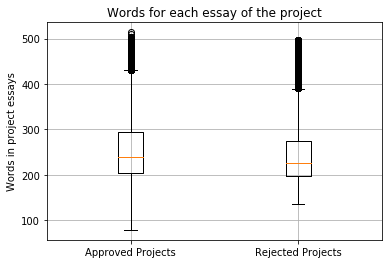

In [31]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()


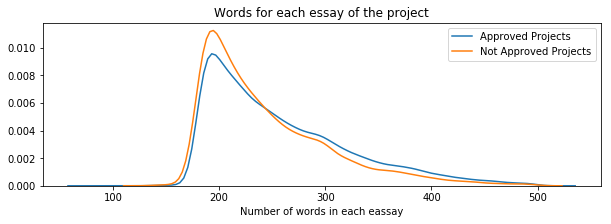

In [32]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()
 


__ SUMMARY:<br>
1) Number of words in project essays is slightly high for approved project when compared to rejected projects. <br>
2) PDF curve almost looks like Log-normal distribution and PDF curve of approved projects is slightly ahead when compared to reject project hence we can say chances of accepting the projects are more when essays have a greater number of words.<br>
3) Chance of rejecting project is high when easy have 200 words because peak for rejecting project is higher than approving project at 200.__


### 1.2.8 Univariate Analysis: Cost per project

In [33]:
# we get the cost of the project using resource.csv file
resource_data.head(2)


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [34]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)
project_data.shape  

(109248, 18)

In [35]:
# join two dataframes in python: 
project_data.shape  
project_data = pd.merge(project_data, price_data, on='id',how='inner')
project_data.shape  

(109248, 20)

In [36]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

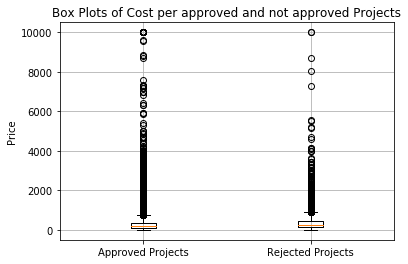

In [37]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

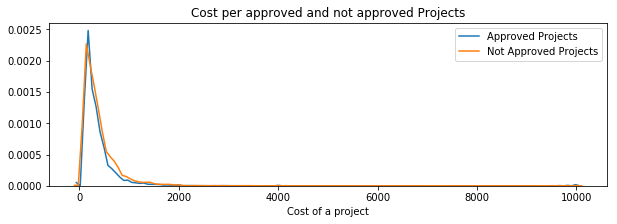

In [38]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [39]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

__ SUMMARY:<br>
1)  Cannot get much information from box plot and PDF curves.<br>
2) Most of the approved project cost is less compare to non-approved project.<br>
3) And maximum cost for approved project is 9999.__


<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

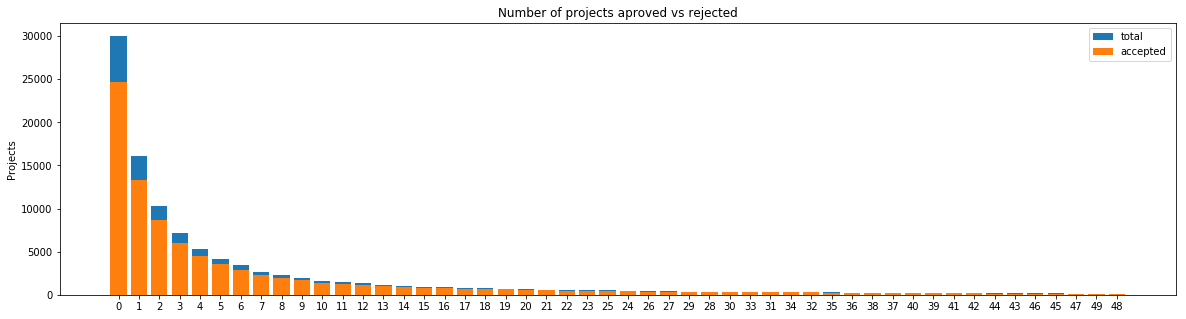

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                24652  30014   
1                                             1                13329  16058   
2                                             2                 8705  10350   
3                                             3                 5997   7110   
4                                             4                 4452   5266   

        Avg  
0  0.821350  
1  0.830054  
2  0.841063  
3  0.843460  
4  0.845423  
    teacher_number_of_previously_posted_projects  project_is_approved  total  \
46                                            46                  149    164   
45                                            45                  141    153   
47                                            47                  129    144   
49                                            49                  128    143   
48                                       

In [40]:
#ploting bar graph for teacher_number_of_previously_posted_projects
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved', top=50)

In [41]:

approved_previously_posted_projects_count=project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values
rejected_previously_posted_projects_count=project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values


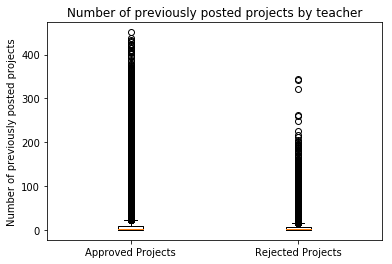

In [42]:
plt.boxplot([approved_previously_posted_projects_count,rejected_previously_posted_projects_count],autorange=True)
plt.title('Number of previously posted projects by teacher')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel("Number of previously posted projects")
plt.show()


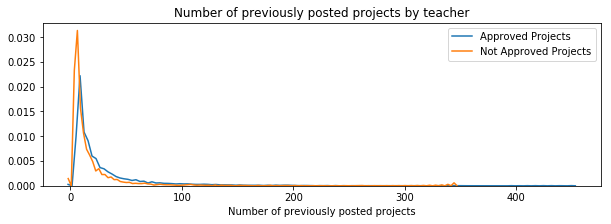

In [43]:
plt.figure(figsize=(10,3))
sns.distplot(approved_previously_posted_projects_count, hist=False, label="Approved Projects")
sns.distplot(rejected_previously_posted_projects_count, hist=False, label="Not Approved Projects")
plt.title('Number of previously posted projects by teacher')
plt.xlabel('Number of previously posted projects')
plt.legend()
plt.show()

In [44]:
# http://zetcode.com/python/prettytable/
x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_previously_posted_projects_count,i), 3), np.round(np.percentile(rejected_previously_posted_projects_count,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.0        |          0.0          |
|     5      |        0.0        |          0.0          |
|     10     |        0.0        |          0.0          |
|     15     |        0.0        |          0.0          |
|     20     |        0.0        |          0.0          |
|     25     |        0.0        |          0.0          |
|     30     |        1.0        |          0.0          |
|     35     |        1.0        |          1.0          |
|     40     |        1.0        |          1.0          |
|     45     |        2.0        |          1.0          |
|     50     |        2.0        |          2.0          |
|     55     |        3.0        |          2.0          |
|     60     |        4.0        |          3.0          |
|     65     |        5.0        |          3.0         

__ SUMMARY:<br>
1)  Cannot get much information from box plot and PDF curves. <br>
2) PDF curve of approved projects is slightly ahead when compared to reject project hence we can say chances of accepting the projects are more when teacher is already requested for many times<br>
3) If project proposals come many times from same teacher chances accepting proposal is high.__


<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

In [45]:
#function to detect  number in strings
def hasNum(inputstr):
    if any(char.isdigit() for char in inputstr):
        return 1
    else:
        return 0
        
digit_in_summary=list(map(hasNum,project_data['project_resource_summary']))
project_data['digit_in_summary']=digit_in_summary
print("Shape of the Project_data after adding digit_in_summary column",project_data.shape)
project_data.head(2)

Shape of the Project_data after adding digit_in_summary column (109248, 21)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,digit_in_summary
0,34858,p000002,638363148ff34bcbe004fcaeb7c9a544,Mrs.,HI,9/20/2016 21:19,Grades 6-8,21st Century Learners Across the Ocean,Our native Hawaiian students of the valley hai...,We like to combine 21st century learning with ...,...,NaN,My students need headphones and supplemental s...,1,1,History_Civics,History_Geography,Our native Hawaiian students of the valley hai...,515.89,21,0
1,89122,p000003,c8e40d76c14dbc404075f9013d5cd166,Mrs.,NY,6/23/2016 9:21,Grades PreK-2,Kindergarten Loves Literacy Centers,My students are excited for their first year i...,Our students love literacy centers! Every morn...,...,NaN,My students need phonemic awareness learning c...,5,1,Literacy_Language,Literature_Writing,My students are excited for their first year i...,298.97,4,0


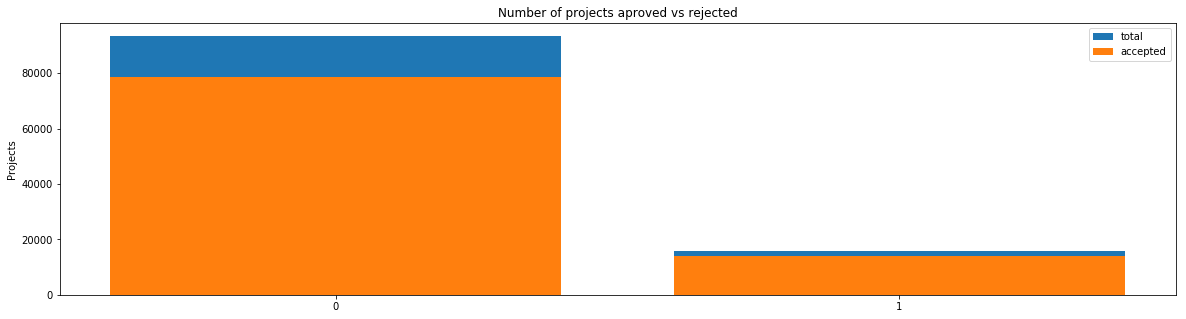

   digit_in_summary  project_is_approved  total       Avg
0                 0                78616  93492  0.840885
1                 1                14090  15756  0.894263
   digit_in_summary  project_is_approved  total       Avg
0                 0                78616  93492  0.840885
1                 1                14090  15756  0.894263


In [46]:
#ploting bar plot
univariate_barplots(project_data, 'digit_in_summary', 'project_is_approved', top=False)

In [47]:
#Grouping “ is digit in summary” variable based on project_is_approved 
approved_digit_in_summary=project_data[project_data['project_is_approved']==1]['digit_in_summary'].values
rejected_digit_in_summary=project_data[project_data['project_is_approved']==0]['digit_in_summary'].values
print(len(approved_digit_in_summary[approved_digit_in_summary[:]==0]),len(rejected_digit_in_summary[rejected_digit_in_summary[:]==0]))

78616 14876


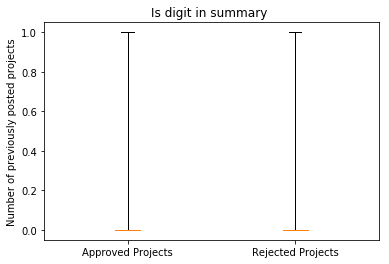

In [48]:
#ploting box plot
plt.boxplot([approved_digit_in_summary,rejected_digit_in_summary],autorange=True)
plt.title('Is digit in summary ')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel("Number of previously posted projects")
plt.show()


C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


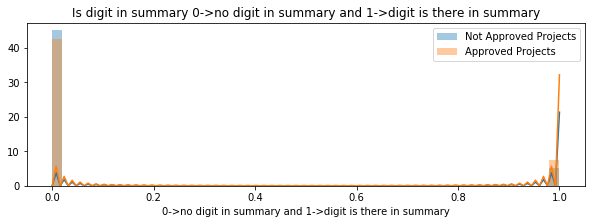

In [102]:
plt.figure(figsize=(10,3))
sns.distplot(rejected_digit_in_summary, hist=True, label="Not Approved Projects")
sns.distplot(approved_digit_in_summary, hist=True, label="Approved Projects")
plt.title('Is digit in summary 0->no digit in summary and 1->digit is there in summary')
plt.xlabel('0->no digit in summary and 1->digit is there in summary')
plt.legend()
plt.show()

In [50]:
#percentile of approved_digit_in_summary and rejected_digit_in_summary
x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_digit_in_summary,i), 3), np.round(np.percentile(rejected_digit_in_summary,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.0        |          0.0          |
|     5      |        0.0        |          0.0          |
|     10     |        0.0        |          0.0          |
|     15     |        0.0        |          0.0          |
|     20     |        0.0        |          0.0          |
|     25     |        0.0        |          0.0          |
|     30     |        0.0        |          0.0          |
|     35     |        0.0        |          0.0          |
|     40     |        0.0        |          0.0          |
|     45     |        0.0        |          0.0          |
|     50     |        0.0        |          0.0          |
|     55     |        0.0        |          0.0          |
|     60     |        0.0        |          0.0          |
|     65     |        0.0        |          0.0         

__SUMMARY:<br>
1) Cannot get much information from box plot and PDF curves. <br>
2) This feature will not contribute to make decision because PDF curves overlap on each other.
__

# 1.3 Text preprocessing

### 1.3.1 Essay Text

In [51]:
project_data.head(2)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,digit_in_summary
0,34858,p000002,638363148ff34bcbe004fcaeb7c9a544,Mrs.,HI,9/20/2016 21:19,Grades 6-8,21st Century Learners Across the Ocean,Our native Hawaiian students of the valley hai...,We like to combine 21st century learning with ...,...,NaN,My students need headphones and supplemental s...,1,1,History_Civics,History_Geography,Our native Hawaiian students of the valley hai...,515.89,21,0
1,89122,p000003,c8e40d76c14dbc404075f9013d5cd166,Mrs.,NY,6/23/2016 9:21,Grades PreK-2,Kindergarten Loves Literacy Centers,My students are excited for their first year i...,Our students love literacy centers! Every morn...,...,NaN,My students need phonemic awareness learning c...,5,1,Literacy_Language,Literature_Writing,My students are excited for their first year i...,298.97,4,0


In [52]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)


Our native Hawaiian students of the valley hail from a tight knit community.  Many are from low socioeconomic backgrounds. Yet they remain a proud people not inclined to ask for hand outs. They   are genuine souls who face trials and tribulations on a daily basis. \r\n\r\nOur students come from predominately low socio-economic backgrounds with over 80% of our students receiving free or reduced lunch.  We also have a population of students who are homeless. \r\n\r\nIn spite of their struggles they come to school with positive attitudes and a smile. They are genuine, caring, and always thankful. Many aspire to attend college and will work hard to make that happen.We like to combine 21st century learning with traditional learning.  This allows our students the time to acclimate to the changes and become active 21st century learners.  \r\n\r\nAs 21st century learners, the students require access to a variety of tools and technology. Use of technology serves to engage the students with vary

In [53]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [54]:
sent = decontracted(project_data['essay'].values[0])
print(sent)
print("="*50)

Our native Hawaiian students of the valley hail from a tight knit community.  Many are from low socioeconomic backgrounds. Yet they remain a proud people not inclined to ask for hand outs. They   are genuine souls who face trials and tribulations on a daily basis. \r\n\r\nOur students come from predominately low socio-economic backgrounds with over 80% of our students receiving free or reduced lunch.  We also have a population of students who are homeless. \r\n\r\nIn spite of their struggles they come to school with positive attitudes and a smile. They are genuine, caring, and always thankful. Many aspire to attend college and will work hard to make that happen.We like to combine 21st century learning with traditional learning.  This allows our students the time to acclimate to the changes and become active 21st century learners.  \r\n\r\nAs 21st century learners, the students require access to a variety of tools and technology. Use of technology serves to engage the students with vary

In [55]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Our native Hawaiian students of the valley hail from a tight knit community.  Many are from low socioeconomic backgrounds. Yet they remain a proud people not inclined to ask for hand outs. They   are genuine souls who face trials and tribulations on a daily basis.     Our students come from predominately low socio-economic backgrounds with over 80% of our students receiving free or reduced lunch.  We also have a population of students who are homeless.     In spite of their struggles they come to school with positive attitudes and a smile. They are genuine, caring, and always thankful. Many aspire to attend college and will work hard to make that happen.We like to combine 21st century learning with traditional learning.  This allows our students the time to acclimate to the changes and become active 21st century learners.      As 21st century learners, the students require access to a variety of tools and technology. Use of technology serves to engage the students with varying learning

In [56]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Our native Hawaiian students of the valley hail from a tight knit community Many are from low socioeconomic backgrounds Yet they remain a proud people not inclined to ask for hand outs They are genuine souls who face trials and tribulations on a daily basis Our students come from predominately low socio economic backgrounds with over 80 of our students receiving free or reduced lunch We also have a population of students who are homeless In spite of their struggles they come to school with positive attitudes and a smile They are genuine caring and always thankful Many aspire to attend college and will work hard to make that happen We like to combine 21st century learning with traditional learning This allows our students the time to acclimate to the changes and become active 21st century learners As 21st century learners the students require access to a variety of tools and technology Use of technology serves to engage the students with varying learning styles We watch videos individua

In [57]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [58]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:24<00:00, 1297.87it/s]


In [59]:
# after preprocesing
preprocessed_essays[0]

'our native hawaiian students valley hail tight knit community many low socioeconomic backgrounds yet remain proud people not inclined ask hand outs they genuine souls face trials tribulations daily basis our students come predominately low socio economic backgrounds 80 students receiving free reduced lunch we also population students homeless in spite struggles come school positive attitudes smile they genuine caring always thankful many aspire attend college work hard make happen we like combine 21st century learning traditional learning this allows students time acclimate changes become active 21st century learners as 21st century learners students require access variety tools technology use technology serves engage students varying learning styles we watch videos individually whole class the lamps allow us turn overhead lights minimize glare the headphones used videos watched individually work well students hearing aids the workbooks provide daily practice structure the carpet runn

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [60]:
# similarly you can preprocess the titles also
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 30029.99it/s]


In [61]:
# after preprocesing
preprocessed_titles[0]

'21st century learners across ocean'

## 1. 4 Preparing data for models

In [62]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'digit_in_summary'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - essays : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [63]:
# we use count vectorizer to convert the values into one hot encoded features
# Project categories
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_categories = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()),lowercase=False, binary=True)
vectorizer_categories.fit(project_data['clean_categories'].values)
print(vectorizer_categories.get_feature_names())
categories_one_hot =vectorizer_categories.transform(project_data['clean_categories'].values)
print(categories_one_hot.toarray()[0:1])
print("\nShape of matrix after one hot encodig for 'Project categories'",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
[[0 0 1 0 0 0 0 0 0]]

Shape of matrix after one hot encodig for 'Project categories' (109248, 9)


In [64]:
# we use count vectorizer to convert the values into one hot encoded features
# Project subcategories
vectorizer_subcategories = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_subcategories.fit(project_data['clean_subcategories'].values)
print(vectorizer_subcategories.get_feature_names())
sub_categories_one_hot = vectorizer_subcategories.transform(project_data['clean_subcategories'].values)
print(sub_categories_one_hot.toarray()[0:2])
print("\nShape of matrix after one hot encodig for 'Project subcategories'",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]

Shape of matrix after one hot encodig for 'Project subcategories' (109248, 30)


In [65]:
# we use count vectorizer to convert the values into one hot encoded features
#teacher_prefix
vectorizer_teacher_prefix = CountVectorizer(lowercase=False, binary=True)
vectorizer_teacher_prefix.fit(project_data['teacher_prefix'].values.astype('str'))
print(vectorizer_teacher_prefix.get_feature_names())
teacher_prefix_one_hot = vectorizer_teacher_prefix.transform(project_data['teacher_prefix'].values.astype('str'))
print(teacher_prefix_one_hot.toarray()[0:1])
print("\nShape of matrix after one hot encodig for teacher prefix ",teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher', 'nan']
[[0 0 1 0 0 0]]

Shape of matrix after one hot encodig for teacher prefix  (109248, 6)


In [103]:
# we use count vectorizer to convert the values into one hot encoded features
#school_state
vectorizer_school_state = CountVectorizer(lowercase=False, binary=True)
vectorizer_school_state.fit(project_data['school_state'].values.astype('str'))
print(vectorizer_school_state.get_feature_names())
school_state_one_hot = vectorizer_school_state.transform(project_data['school_state'].values.astype('str'))
print(school_state_one_hot.toarray()[0:1])
print("\nShape of matrix after one hot encodig for school states ",school_state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

Shape of matrix after one hot encodig for school states  (109248, 51)


In [67]:
#Preprocessing the project_grade_category
project_grade_category_cleaned=[]
for grade in tqdm(project_data['project_grade_category'].values):
    grade = grade.replace(' ', '_')
    grade = grade.replace('-', '_')
    project_grade_category_cleaned.append(grade)
project_data['Project_grade_category']=project_grade_category_cleaned

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 723901.20it/s]


In [107]:
# we use count vectorizer to convert the values into one hot encoded features
#project_grade_category
vectorizer_grade_category = CountVectorizer(lowercase=False, binary=True)
vectorizer_grade_category.fit(project_grade_category_cleaned)
print(vectorizer_grade_category.get_feature_names())
grade_category_one_hot = vectorizer_grade_category.transform(project_grade_category_cleaned)
print(grade_category_one_hot.toarray()[0:1])
print("\nShape of matrix after one hot encodig for school states ",grade_category_one_hot.shape)

['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']
[[0 1 0 0]]

Shape of matrix after one hot encodig for school states  (109248, 4)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [108]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#Bag of words of Project essays
vectorizer = CountVectorizer(min_df=8)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 18217)


In [109]:
print('Some feature names of bag of words of the essays')
print('='*50)
print(vectorizer.get_feature_names()[1000:1020])
print(text_bow.toarray()[0:1])

Some feature names of bag of words of the essays
['angry', 'angst', 'animal', 'animals', 'animate', 'animated', 'animation', 'animations', 'animators', 'anime', 'animoto', 'ankle', 'ankles', 'ann', 'anna', 'annan', 'anne', 'annex', 'annie', 'anniversary']
[[0 0 0 ... 0 0 0]]


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [71]:
# We are considering only the words which appeared in at least 5 documents(rows or projects).
#Bag of words project_title
vectorizer = CountVectorizer(min_df=5)
text_bow_title = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",text_bow_title.shape)

Shape of matrix after one hot encodig  (109248, 5107)


In [72]:
print('Some feature names of bag of words of the project title')
print('='*50)
print(vectorizer.get_feature_names()[1000:1020])
print(text_bow_title.toarray()[0:2])

Some feature names of bag of words of the project title
['connections', 'connects', 'conquer', 'conquering', 'conscious', 'conservation', 'console', 'construct', 'constructing', 'construction', 'constructions', 'consumer', 'consumers', 'contagious', 'contained', 'container', 'containers', 'contemporary', 'content', 'context']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### 1.4.2.3 TFIDF vectorizer

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_essays = TfidfVectorizer(min_df=10)
text_tfidf = tfidf_vectorizer_essays.fit_transform(preprocessed_essays)
print("Shape of matrix TFIDF Vectorizer on essays ",text_tfidf.shape)

Shape of matrix TFIDF Vectorizer on essays  (109248, 16623)


In [74]:
print('Sample of TFIDF Vectorizer on essays')
print('='*50)
print(text_tfidf.toarray()[0:1])
print(tfidf_vectorizer_essays.get_feature_names()[300:310])

Sample of TFIDF Vectorizer on essays
[[0. 0. 0. ... 0. 0. 0.]]
['aac', 'ab', 'aba', 'abacus', 'abandon', 'abandoned', 'abc', 'abcmouse', 'abcs', 'abcya']


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [75]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_title = TfidfVectorizer(min_df=10)
title_tfidf = tfidf_vectorizer_title.fit_transform(preprocessed_titles)
print("Shape of matrix of TFIDF Vectorizer on project title",title_tfidf.shape)

Shape of matrix of TFIDF Vectorizer on project title (109248, 3329)


In [123]:
print('Sample of TFIDF Vectorizer on `project_title`')
print('='*50)
print(title_tfidf.toarray()[0:1,1980:2000])
print(tfidf_vectorizer_title.get_feature_names()[100:110])

Sample of TFIDF Vectorizer on `project_title`
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['alert', 'alexa', 'algebra', 'alive', 'all', 'allow', 'allowing', 'allows', 'almost', 'along']


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [77]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

'''# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================
'''
words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


Loading Glove Model


1917495it [06:56, 4601.36it/s]


Done. 1917495  words loaded!
all the words in the coupus 17014267
the unique words in the coupus 58968
The number of words that are present in both glove vectors and our coupus 51503 ( 87.341 %)
word 2 vec length 51503


In [78]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [79]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[1]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:50<00:00, 2168.43it/s]


109248
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [80]:
# average Word2Vec for project_title
# compute average word2vec for each review.
avg_w2v_vectors_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title.append(vector)

print(len(avg_w2v_vectors_project_title))
print(len(avg_w2v_vectors_project_title[1]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 43035.67it/s]


109248
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [81]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [82]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [05:05<00:00, 357.10it/s]


109248
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [83]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_project_title = TfidfVectorizer()
tfidf_model_project_title.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_project_title.get_feature_names(), list(tfidf_model_project_title.idf_)))
tfidf_project_title_words = set(tfidf_model_project_title.get_feature_names())

In [84]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_project_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_project_title_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_project_title_vectors.append(vector)

print(len(tfidf_w2v_project_title_vectors))
print(len(tfidf_w2v_project_title_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 21349.76it/s]


109248
300


### 1.4.3 Vectorizing Numerical features

In [85]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [86]:
price_standardized

array([[ 0.59257911],
       [ 0.00231474],
       [ 2.21926194],
       ...,
       [-0.33208314],
       [ 1.39694084],
       [-0.2056057 ]])

In [87]:
#quantity
quantity_scalar = StandardScaler()
quantity_scalar.fit(project_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized = quantity_scalar.transform(project_data['quantity'].values.reshape(-1, 1))

C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Mean : 16.965610354422964, Standard deviation : 26.18282191909318


C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [88]:
#teacher_number_of_previously_posted_projects
teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Mean : 11.153165275336848, Standard deviation : 27.77702641477403


C:\Users\nnagari\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [89]:
print(school_state_one_hot.shape)
print(categories_one_hot.shape)
#print(sub_categories.shape)
print(sub_categories_one_hot.shape)
print(teacher_prefix_one_hot.shape)
print(grade_category_one_hot.shape)
print(price_standardized.shape)
print(quantity_standardized.shape)
print(teacher_number_of_previously_posted_projects_standardized.shape)
print(text_bow_title.shape)



(109248, 51)
(109248, 9)
(109248, 30)
(109248, 6)
(109248, 4)
(109248, 1)
(109248, 1)
(109248, 1)
(109248, 5107)


In [124]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#categorical, numerical features + project_title(BOW)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_BOW= hstack((school_state_one_hot,categories_one_hot, sub_categories_one_hot,teacher_prefix_one_hot,grade_category_one_hot,price_standardized,teacher_number_of_previously_posted_projects_standardized,text_bow_title))
x_BOW=X_BOW.toarray()
print(X_BOW.shape)

(109248, 5209)


In [125]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#categorical, numerical features + project_title(TFIDF)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_TFIDF= hstack((school_state_one_hot,categories_one_hot, sub_categories_one_hot,teacher_prefix_one_hot,grade_category_one_hot,price_standardized,teacher_number_of_previously_posted_projects_standardized,title_tfidf))
print(X_TFIDF.shape)
X_TFIDF=X_TFIDF.toarray()

(109248, 3431)


In [126]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# categorical, numerical features + project_title(AVG W2V)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_AVG_W2V= hstack((school_state_one_hot,categories_one_hot, sub_categories_one_hot,teacher_prefix_one_hot,grade_category_one_hot,price_standardized,teacher_number_of_previously_posted_projects_standardized,avg_w2v_vectors_project_title))
print(X_AVG_W2V.shape)
X_AVG_W2V=X_AVG_W2V.toarray()

(109248, 402)


In [127]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# categorical, numerical features + project_title(TFIDF W2V)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tfidf_w2v= hstack((school_state_one_hot,categories_one_hot, sub_categories_one_hot,teacher_prefix_one_hot,grade_category_one_hot,price_standardized,teacher_number_of_previously_posted_projects_standardized,tfidf_w2v_project_title_vectors))
print(X_tfidf_w2v.shape)
X_tfidf_w2v=X_tfidf_w2v.toarray()

(109248, 402)


In [128]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# concatenation all the features 
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_all_fetures= hstack((school_state_one_hot,categories_one_hot, sub_categories_one_hot,teacher_prefix_one_hot,grade_category_one_hot,price_standardized,teacher_number_of_previously_posted_projects_standardized,text_bow_title,title_tfidf,avg_w2v_vectors_project_title,tfidf_w2v_project_title_vectors))
print(X_all_fetures.shape)
X_all_fetures=X_all_fetures.toarray()

(109248, 9138)


<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_grade_category : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

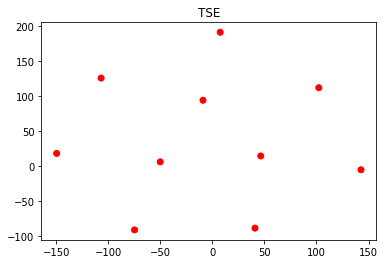

In [94]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris['data'][0:10]
y = iris['target'][0:10]

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSE")
plt.show()

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

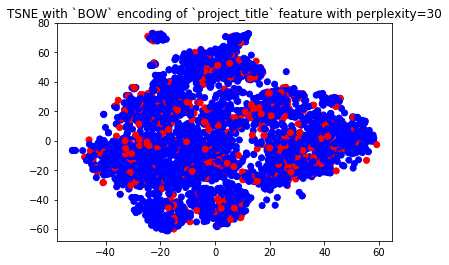

In [137]:
#https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.reshape.html#pandas.Series.reshape
# please write all of the code with proper documentation and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
    
x = x_BOW[0:5000]
y = project_data['project_is_approved'][0:5000]

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `BOW` encoding of `project_title` feature with perplexity=30")
plt.show()   
    

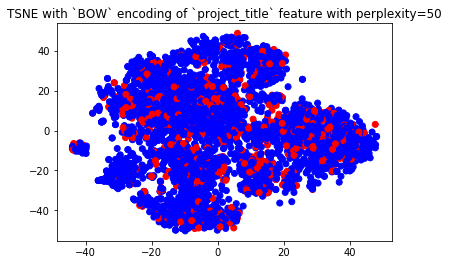

In [138]:
#https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.reshape.html#pandas.Series.reshape
# please write all of the code with proper documentation and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
    
x = x_BOW[0:5000]
y = project_data['project_is_approved'][0:5000]

tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `BOW` encoding of `project_title` feature with perplexity=50")
plt.show() 

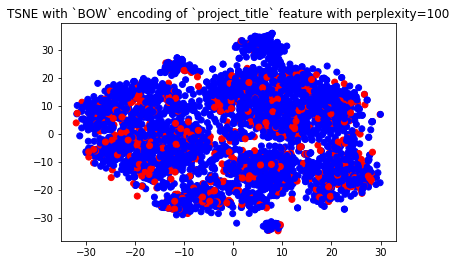

In [139]:
#https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.reshape.html#pandas.Series.reshape
# please write all of the code with proper documentation and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
    
x = x_BOW[0:5000]
y = project_data['project_is_approved'][0:5000]

tsne = TSNE(n_components=2, perplexity=100, learning_rate=300)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `BOW` encoding of `project_title` feature with perplexity=100")
plt.show() 

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

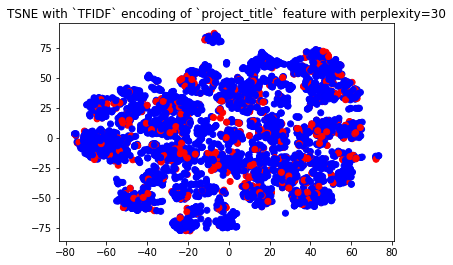

In [140]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
x = X_TFIDF[0:5000]
y = project_data['project_is_approved'][0:5000]

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding,y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `TFIDF` encoding of `project_title` feature with perplexity=30")
plt.show()   
        

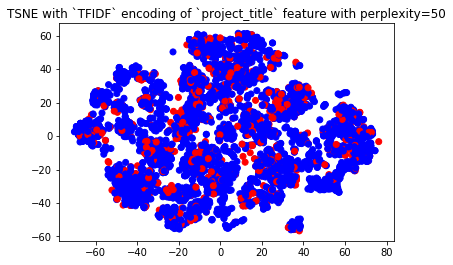

In [142]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
x = X_TFIDF[0:5000]
y = project_data['project_is_approved'][0:5000]

tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding,y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `TFIDF` encoding of `project_title` feature with perplexity=50")
plt.show()   
        
        

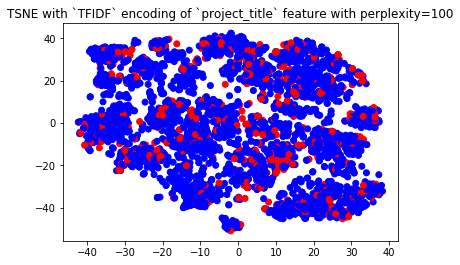

In [143]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
x = X_TFIDF[0:5000]
y = project_data['project_is_approved'][0:5000]

tsne = TSNE(n_components=2, perplexity=100, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding,y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `TFIDF` encoding of `project_title` feature with perplexity=100")
plt.show()   
         
        

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

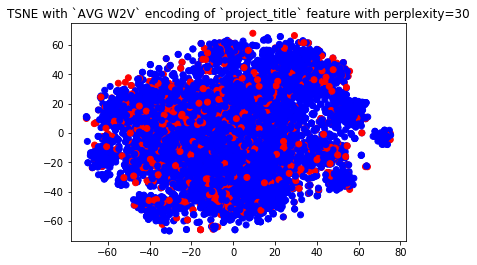

In [144]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
x = X_AVG_W2V[0:7000]
y = project_data['project_is_approved'][0:7000]
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `AVG W2V` encoding of `project_title` feature with perplexity=30")
plt.show() 

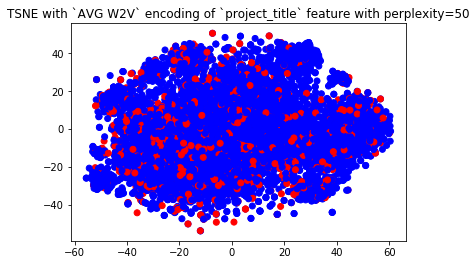

In [145]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
x = X_AVG_W2V[0:7000]
y = project_data['project_is_approved'][0:7000]
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `AVG W2V` encoding of `project_title` feature with perplexity=50")
plt.show() 

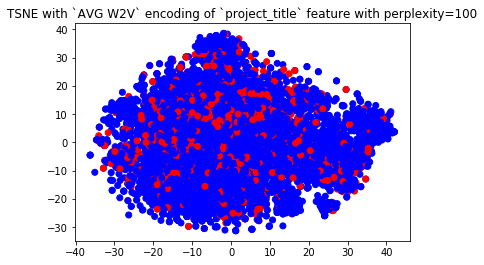

In [146]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
x = X_AVG_W2V[0:7000]
y = project_data['project_is_approved'][0:7000]
tsne = TSNE(n_components=2, perplexity=100, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `AVG W2V` encoding of `project_title` feature with perplexity=100")
plt.show() 

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

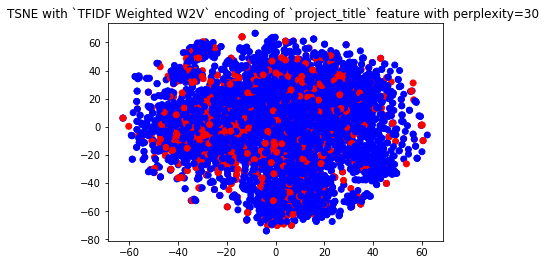

In [147]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
x = X_tfidf_w2v[0:5000]
y = project_data['project_is_approved'][0:5000]

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature with perplexity=30 ")
plt.show() 


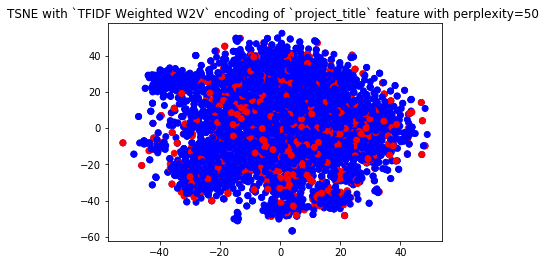

In [148]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
x = X_tfidf_w2v[0:5000]
y = project_data['project_is_approved'][0:5000]

tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature with perplexity=50 ")
plt.show() 

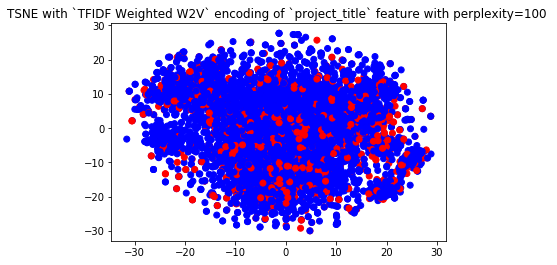

In [149]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
x = X_tfidf_w2v[0:5000]
y = project_data['project_is_approved'][0:5000]

tsne = TSNE(n_components=2, perplexity=100, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature with perplexity=100 ")
plt.show() 

<h2> 2.4 TSNE with all feature </h2>

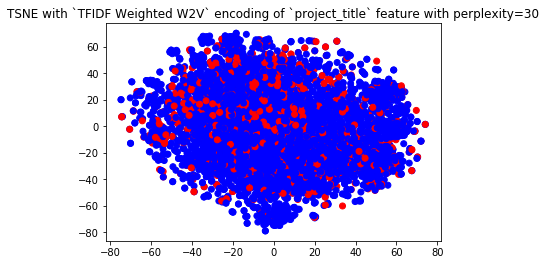

In [150]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
x =X_all_fetures[0:5000]
y = project_data['project_is_approved'][0:5000]

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature with perplexity=30")
plt.show() 


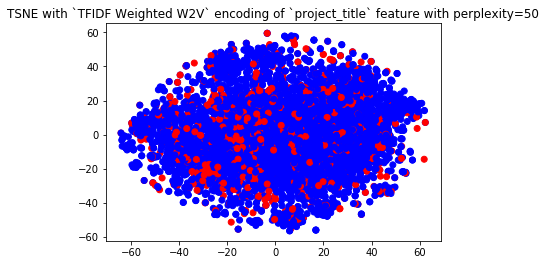

In [151]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
x =X_all_fetures[0:5000]
y = project_data['project_is_approved'][0:5000]

tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature with perplexity=50")
plt.show() 


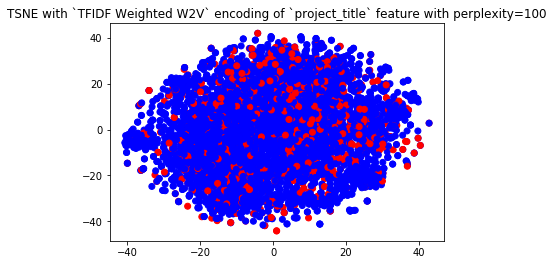

In [152]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
x =X_all_fetures[0:5000]
y = project_data['project_is_approved'][0:5000]

tsne = TSNE(n_components=2, perplexity=100, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.title("TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature with perplexity=100")
plt.show() 


<h2> 2.5 Summary </h2>

__<br>
1)	From figure 'TSE with BOW and TFIDF' we can see multiples of small cluster of datapoint but most of the approved project and rejected project datapoint overlapped hence we cannot draw decision line to separate both classes.<br>
2)	From figure 'TSE with AVG W2V, TFIDF W2V' we can see that approved project and rejected project datapoint overlapped we can conclude that most of the words used in project title are same for both approved project and rejected project. 
__